# Correspondence Analysis
Correspondence Analysis (CA) is an exploratory multivariate technique used to analyze relationships in a two-way contingency table (categorical data).
It’s often described as PCA for categorical variables.

# 🔹 Purpose
Visualize associations between rows and columns of a contingency table.

Reduce the dimensionality of the data to two or three dimensions for easier interpretation.

# 🔹 How It Works
Start with a contingency table (rows = categories of one variable, columns = categories of another).

Convert raw counts into relative frequencies (divide by total).

Compute row profiles and column profiles (proportions in each row/column).

Calculate chi-square distances between profiles.

Perform Singular Value Decomposition (SVD) to find axes that explain the most association.

Plot points for rows and columns in the same map (biplot).

Points close together → categories are associated.

# 🔹 Output
Eigenvalues → show variance explained by each dimension.

Row and column coordinates → positions in reduced space.

Biplot → joint display of row and column points.

# 🔹 Advantages
Works well with categorical data.

Provides a clear visual map of associations.

Symmetrical treatment of rows and columns.

# 🔹 Limitations
Sensitive to small counts and rare categories.

Interpretation can be subjective.



In [8]:
import pandas as pd
import prince

import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv", index_col=0)

# Discretize into 3 bins (Low, Medium, High)
usarrests_cat = df.apply(lambda x: pd.cut(x, 3, labels=["Low","Medium","High"]))

# Build contingency table (example Murder vs Assault)
tab = pd.crosstab(usarrests_cat["Murder"], usarrests_cat["Assault"])

# Correspondence Analysis
ca = prince.CA(n_components=2)
ca = ca.fit(tab)

eigvals = ca.eigenvalues_
explained_inertia = eigvals / eigvals.sum()
print("Explained inertia:", explained_inertia)





Explained inertia: [0.98845284 0.01154716]


Dimension 1 explains 98.8% of the variance (inertia) in the data.Dimension 2 adds only 1.2%, so most of the structure in the data is captured in just one dimension.This suggests the relationships among the categories are primarily aligned along one dominant axis.

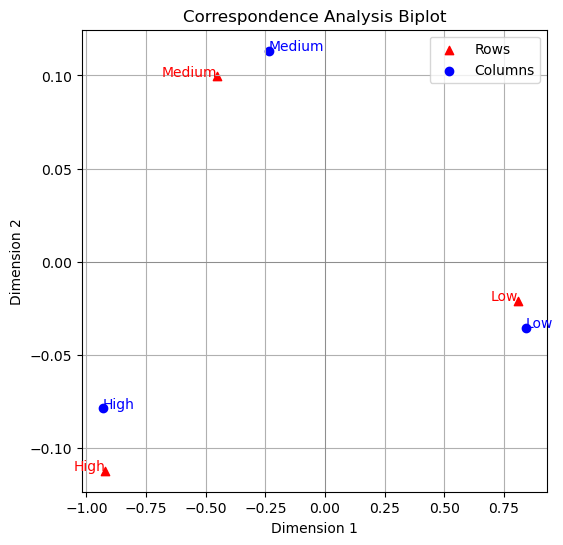

In [9]:
# Build contingency table (example: Murder vs Assault)
tab = pd.crosstab(usarrests_cat["Murder"], usarrests_cat["Assault"])

# Correspondence Analysis
ca = prince.CA(n_components=2)
ca = ca.fit(tab)

# Get coordinates
row_coords = ca.row_coordinates(tab)
col_coords = ca.column_coordinates(tab)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot rows (e.g., red triangles)
ax.scatter(row_coords[0], row_coords[1], color='red', marker='^', label='Rows')
for i, label in enumerate(row_coords.index):
    ax.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], label, color='red', ha='right')

# Plot columns (e.g., blue circles)
ax.scatter(col_coords[0], col_coords[1], color='blue', marker='o', label='Columns')
for i, label in enumerate(col_coords.index):
    ax.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], label, color='blue', ha='left')

# Axis lines and labels
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("Correspondence Analysis Biplot")
ax.legend()
plt.grid(True)
plt.show()

The plot shows that "Low" and "High" row and column categories are closely aligned, indicating strong associations between them. The "Medium" categories are centrally located, suggesting a weaker or more neutral relationship.